In [16]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.optim import AdamW
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


BATCH_SIZE = 32

main_path = "C:\\Users\\munod\\OneDrive\\Documents\\Datasets\\Tuberculosis_(TB)_Chest_X-ray_Database\\TB_Chest_Radiography_Database"
directories = os.listdir(main_path)
images = []
labels = []
for direct in directories:
    #print(direct)
    path1 = os.path.join(main_path, direct)
    files = os.listdir(path1)
    if direct == "Normal":
        code = 0
    elif direct == "Tuberculosis":
        code = 1
    
    counter = 0
    for file in files:
        img = cv2.imread(os.path.join(path1,file))
        img = cv2.resize(img, (200,200))
        labels.append(code)
        images.append(img)
        counter += 1


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
images = np.asarray(images)
labels = np.asarray(labels)
display("Shape of Images" , images.shape, "Label Shape", labels.shape, counter)

'Shape of Images'

(4200, 200, 200, 3)

'Label Shape'

(4200,)

700

In [19]:
data = images/255.0

In [20]:
X_train,X_test_combined, y_train, y_test_combined = train_test_split(data, labels, test_size=0.4, shuffle=True)


In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_test_combined, y_test_combined, test_size=0.5, shuffle=True)

In [31]:
class create_dataset(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
        

In [32]:
train_data = create_dataset(X_train, y_train)
val_data = create_dataset(X_val, y_val)
test_data = create_dataset(X_test, y_test)

In [43]:

class Custom_VGG19_Binary_Classifier(nn.Module):
    def __init__(self):
        super(Custom_VGG19_Binary_Classifier, self).__init__()
        self.base_model = torchvision.models.vgg19(pretrained=True)

        for param in list(self.base_model.parameters())[:-3]:
            param.requires_grad = False
        
        self.base_model.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.base_model(x)
        


In [44]:
model = Custom_VGG19_Binary_Classifier()
summary(model, (3, 224,224))

C:\Users\munod\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\munod\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [45]:
model = model.to(device)

In [ ]:
def train():
    pass
def eval():
    pass
def epoch(model, data, lr, optimizer, patience):
    model


In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

AttributeError: 'Custom_VGG19_Binary_Classifier' object has no attribute 'compile'

In [32]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - binary_accuracy: 0.8236 - loss: 0.8387 - val_binary_accuracy: 0.9803 - val_loss: 0.0614
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - binary_accuracy: 0.9802 - loss: 0.0795 - val_binary_accuracy: 0.9939 - val_loss: 0.0420
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 343s 6s/step - binary_accuracy: 0.9914 - loss: 0.0390 - val_binary_accuracy: 0.9742 - val_loss: 0.0651
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - binary_accuracy: 0.9909 - loss: 0.0303 - val_binary_accuracy: 0.9970 - val_loss: 0.0218
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - binary_accuracy: 0.9967 - loss: 0.0158 - val_binary_accuracy: 0.9924 - val_loss: 0.0221
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - binary_accuracy: 0.9974 - loss: 0.0123 - val_binary_accuracy: 0.9909 - val_loss: 0.0253
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - binary_accuracy: 0.9974 - loss: 0.0124 - val_binary_accuracy: 0.9985 - val_loss: 0.0175
Epoch 8/10
62

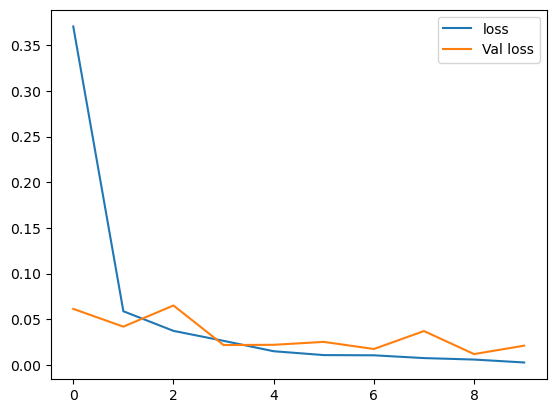

In [33]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

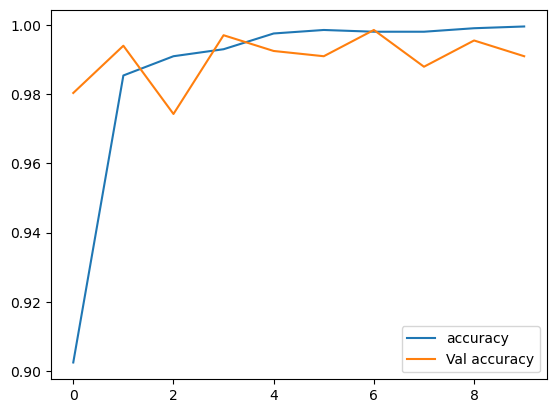

In [34]:
plt.plot(model.history.history['binary_accuracy'], label='accuracy')
plt.plot(model.history.history['val_binary_accuracy'], label='Val accuracy')
plt.legend()
plt.show()

In [35]:
result = model.evaluate(X_test, y_test, batch_size=32)


print(f'The accuracy is {result[1]}')
print(f'The loss is {result[0]}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 20762s 1038s/step - binary_accuracy: 0.9893 - loss: 0.0270
The accuracy is 0.9939393997192383
The loss is 0.021973364055156708


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


y_pred = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step


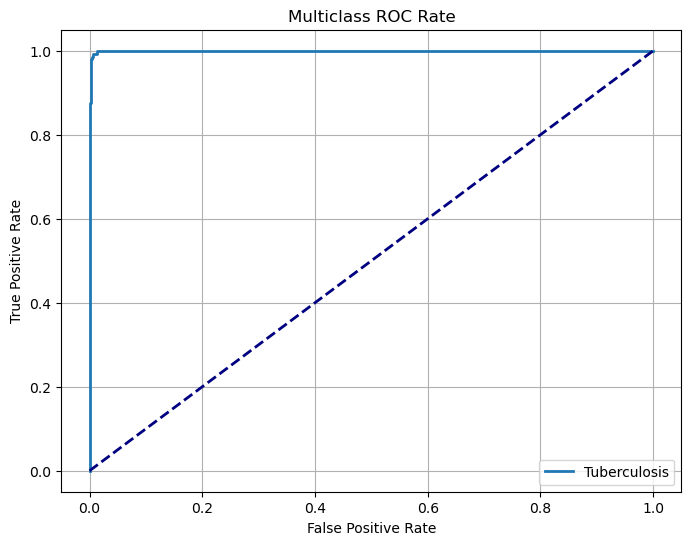

AUROC for class Tuberculosis : 1.000


In [37]:
y_true = y_test
n_classes = 2
fpr = {}
tpr = {}
# roc_auc = {}
classes_names = {0:"Normal", 1:"Tuberculosis"}
classes_names_list = ["Tuberculosis"]


fpr, tpr,  _ =  roc_curve(y_true, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))

plt.plot(
    fpr, tpr, 
    lw=2,
    label=f"Class {1} (area = {roc_auc:.3f})"
)

plt.plot([0,1], [0,1], color="navy", lw=2, linestyle= "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Rate")
plt.legend(classes_names_list, loc="lower right")
plt.grid()
plt.show()


print(f"AUROC for class {classes_names[1]} : {roc_auc:.3f}")


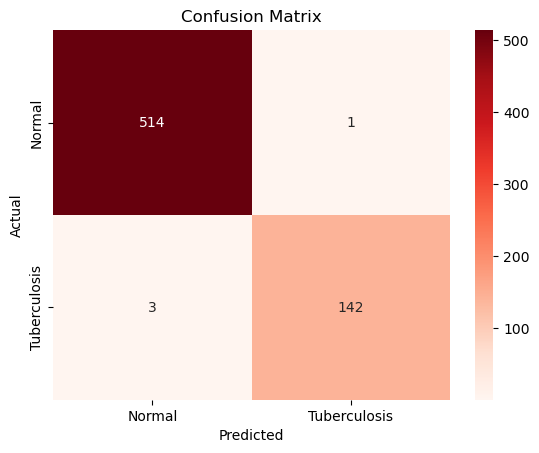

In [38]:
cm = confusion_matrix(y_true=y_true, y_pred=np.round(y_pred))

sns.heatmap(cm, cmap="Reds", 
            annot=True, 
            fmt='g',
            xticklabels=["Normal","Tuberculosis"],
            yticklabels=["Normal","Tuberculosis"],
            )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
print(f"Sensitivity to correctly classifiy a CXR with TB {cm[1][1]/(cm[1][1]+cm[1][0]):.3f}")
print(f"Specificity to correctly classifiy a CXR with TB {cm[1][1]/(cm[1][1]+cm[0][1]):.3f}")

Sensitivity to correctly classifiy a CXR with TB 0.979
Specificity to correctly classifiy a CXR with TB 0.993


In [40]:

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,872,005 (110.14 MB)

 Trainable params: 4,719,105 (18.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 9,438,212 (36.00 MB)

In [ ]:
model.save("cxr_normal_tb_vgg16_model.keras")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cxr_normal_tb_vgg16_model.keras")

Next Steps
1. Train on more data
2. Augument the Data
3. Create a model that identifies if an image is a CXR before predicting if TB is present or not 
4. Send an Alert is TB is likely
5. Segment Abnormal area